In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('FOOD_WASTE.csv')

In [3]:
df.sample(1)

,LOCATION,Country,CAT,Category,ACT,Activity,UNIT,Unit,VAR,Variable,SRC,Source,TIME,Time,Value,Flag Codes,Flags
699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.drop(['LOCATION','CAT','ACT','UNIT','VAR','SRC','Source','Flag Codes','Flags', 'TIME'], axis= 1, inplace=True)

In [5]:
df.sample(5)

,Country,Category,Activity,Unit,Variable,Time,Value
767,Canada,1. Food loss - Food waste,Households,tonnes,Food Waste - Edible food (incl bev),2010.0,226796.0
234,Poland,2. Waste in general,Agricultural production,tonnes,Animal waste,2010.0,543887.0
1367,Denmark,2. Waste in general,Households,tonnes,Animal and mixed food waste,2010.0,482305.0
1369,Denmark,2. Waste in general,Households,tonnes,Animal and mixed food waste; vegetal waste,2006.0,482305.0
2592,Poland,2. Waste in general,Combined: Eurostat proxy for services,tonnes,Animal and mixed food waste; vegetal waste,2006.0,357886.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3078 entries, 0 to 3077
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Country   2207 non-null   object 
 1   Category  2207 non-null   object 
 2   Activity  2207 non-null   object 
 3   Unit      2207 non-null   object 
 4   Variable  2207 non-null   object 
 5   Time      2207 non-null   float64
 6   Value     2207 non-null   float64
dtypes: float64(2), object(5)
memory usage: 168.5+ KB


In [7]:
df.isnull().sum()

Country     871
Category    871
Activity    871
Unit        871
Variable    871
Time        871
Value       871
dtype: int64

In [8]:
df1=df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [9]:
df1.duplicated().sum()

3

In [10]:
df1[df1.duplicated()]

,Country,Category,Activity,Unit,Variable,Time,Value
783,Denmark,1. Food loss - Food waste,Households,tonnes,Food Waste - Edible,2011.0,226796.0
1224,United States,1. Food loss - Food waste,Households,tonnes,Food Loss - Meat,2008.0,421354.0
1227,United States,1. Food loss - Food waste,Households,tonnes,Food Loss - Tree nuts and peanuts,2008.0,421354.0


In [11]:
df1.drop_duplicates(inplace=True)

<ipython-input-11-1788250b656d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(inplace=True)


In [12]:
df1.duplicated().sum()

0

In [13]:
df1.sample(5)

,Country,Category,Activity,Unit,Variable,Time,Value
2183,Iceland,2. Waste in general,Combined: Eurostat proxy for manufacturing of ...,tonnes,Animal and vegetal waste,2004.0,543887.0
696,Sweden,1. Food loss - Food waste,Restaurants,tonnes,Food Waste,2010.0,99000.0
299,Sweden,2. Waste in general,Agricultural production,tonnes,Animal and mixed food waste; vegetal waste,2006.0,226161.0
1888,Italy,1. Food loss - Food waste,Combined : Post-production and Pre-consumption,tonnes,Food Waste - Treenuts,2009.0,4000.0
2345,Sweden,2. Waste in general,Combined: Eurostat proxy for manufacturing of ...,tonnes,Animal and mixed food waste; vegetal waste,2006.0,601327.0


In [14]:
df1.isnull().sum()

Country     0
Category    0
Activity    0
Unit        0
Variable    0
Time        0
Value       0
dtype: int64

In [15]:
df1['Unit'].value_counts(normalize=True)

tonnes        0.993648
tonnnes       0.005445
tonnes/day    0.000907
Name: Unit, dtype: float64

In [16]:
df1.Category.mode()

0    2. Waste in general
dtype: object

In [17]:
df1.Category.value_counts().sort_index()

1. Food loss - Food waste     931
2. Waste in general          1245
4. Others                      28
Name: Category, dtype: int64

In [18]:
df1.Activity.mode()

0    Households
dtype: object

In [19]:
df1.Activity.value_counts().sort_index()

Agricultural production                                                           331
Combined : Post-production                                                         11
Combined : Post-production and Pre-consumption                                    272
Combined : pre-retail                                                              84
Combined: Eurostat proxy for manufacturing of food products - includes tobacco    366
Combined: Eurostat proxy for services                                             292
Contextual data                                                                    15
Food Industry                                                                      36
Food Services                                                                      24
Grocery stores                                                                      2
Households                                                                        542
Industrial kitchens                                   

In [20]:
df1.Variable.mode()

0    Animal and mixed food waste; vegetal waste
dtype: object

In [21]:
df1.Variable.value_counts()

Animal and mixed food waste; vegetal waste       595
Animal waste of food preparation and products    268
Animal and mixed food waste                       98
Vegetal waste                                     90
Food Waste                                        84
                                                ... 
Food Waste - Non-edible                            1
Possibly avoidable food waste - Oil and fat        1
Food waste in schools in 40 weeks (primary)        1
Food Waste - Drinks                                1
Solid waste considered food waste                  1
Name: Variable, Length: 258, dtype: int64

In [22]:
df1.Time.unique()

array([2011., 2007., 2008., 2009., 2010., 2012., 2000., 2001., 2002.,
       2003., 2004., 2005., 2006., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2013.])

In [23]:
df1['Country'].value_counts(normalize= True)

United Kingdom                  0.068512
Netherlands                     0.066243
Austria                         0.055808
United States                   0.049002
Canada                          0.048548
Denmark                         0.047641
Slovak Republic                 0.042196
Czech Republic                  0.038566
Japan                           0.036751
Sweden                          0.036298
Hungary                         0.034483
Germany                         0.034029
Norway                          0.033575
Turkey                          0.033575
Spain                           0.033575
Estonia                         0.032668
Poland                          0.032668
Portugal                        0.032214
Italy                           0.031760
Australia                       0.029492
Luxembourg                      0.028131
Finland                         0.027223
Ireland                         0.024501
Greece                          0.022232
Belgium         

In [24]:
def get_unique_counts(i):
    print(df1[i].value_counts())
    print("-------------------------------------------------------------------")

In [25]:
num = []
cat = []

for i in df1.columns:
    if df1[i].dtype == 'object':
        cat.append(i)
    else:
        num.append(i)
print(cat)
print(num)

['Country', 'Category', 'Activity', 'Unit', 'Variable']
['Time', 'Value']


In [26]:
for f in cat:
    get_unique_counts(f)

United Kingdom                  151
Netherlands                     146
Austria                         123
United States                   108
Canada                          107
Denmark                         105
Slovak Republic                  93
Czech Republic                   85
Japan                            81
Sweden                           80
Hungary                          76
Germany                          75
Norway                           74
Turkey                           74
Spain                            74
Estonia                          72
Poland                           72
Portugal                         71
Italy                            70
Australia                        65
Luxembourg                       62
Finland                          60
Ireland                          54
Greece                           49
Belgium                          46
Korea                            43
France                           43
Mexico                      

In [27]:
df_cat = df1.select_dtypes(include = ['object'])
lstcatcolumns = list(df_cat.columns.values)
lstcatcolumns

['Country', 'Category', 'Activity', 'Unit', 'Variable']

In [28]:
def univariateAnalysis_category(cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    plt.figure(figsize=(10,9))
    df_cat[cat_column].value_counts().plot.bar(title="Frequency Distribution of " + cat_column)
    plt.show()
    print("       ")

Details of Country
----------------------------------------------------------------


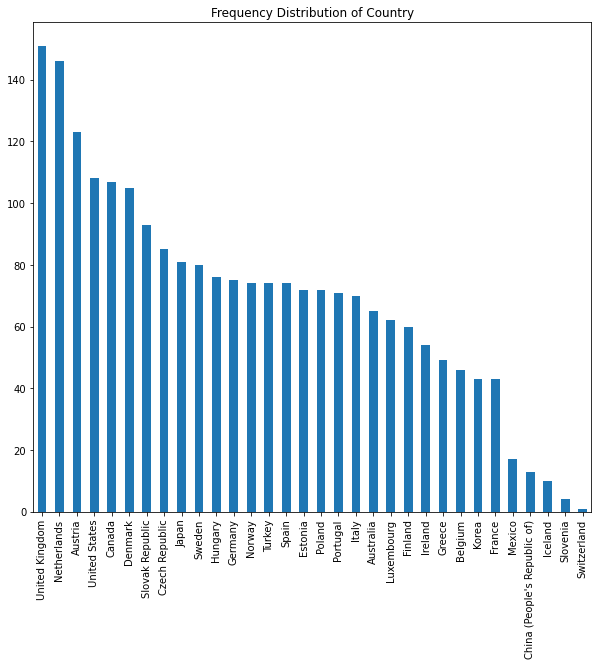

       
Details of Category
----------------------------------------------------------------


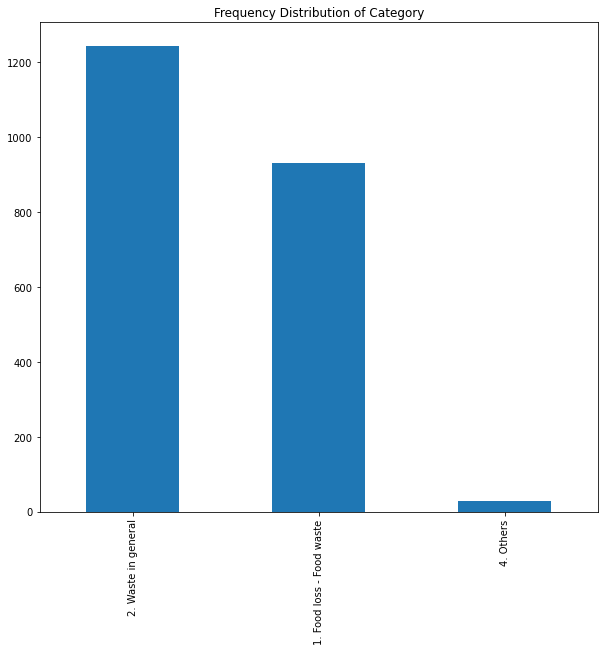

       
Details of Activity
----------------------------------------------------------------


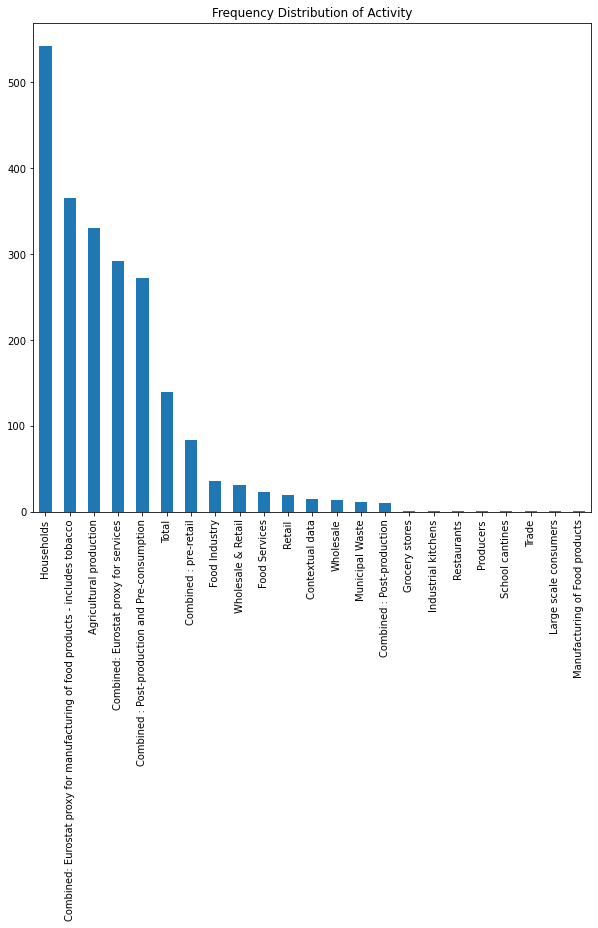

       
Details of Unit
----------------------------------------------------------------


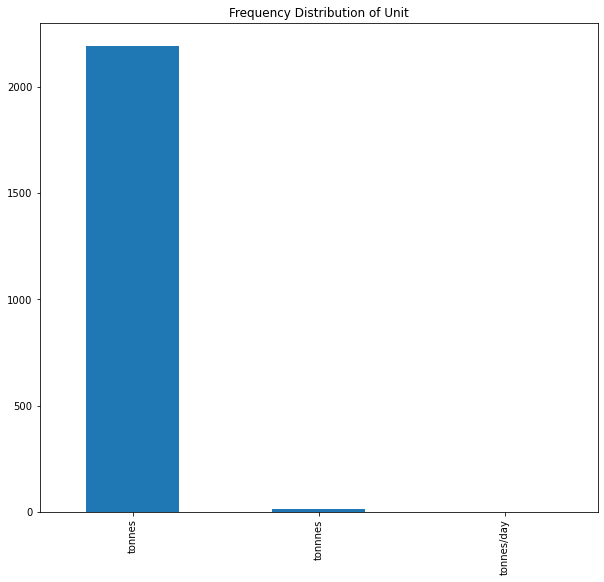

       
Details of Variable
----------------------------------------------------------------


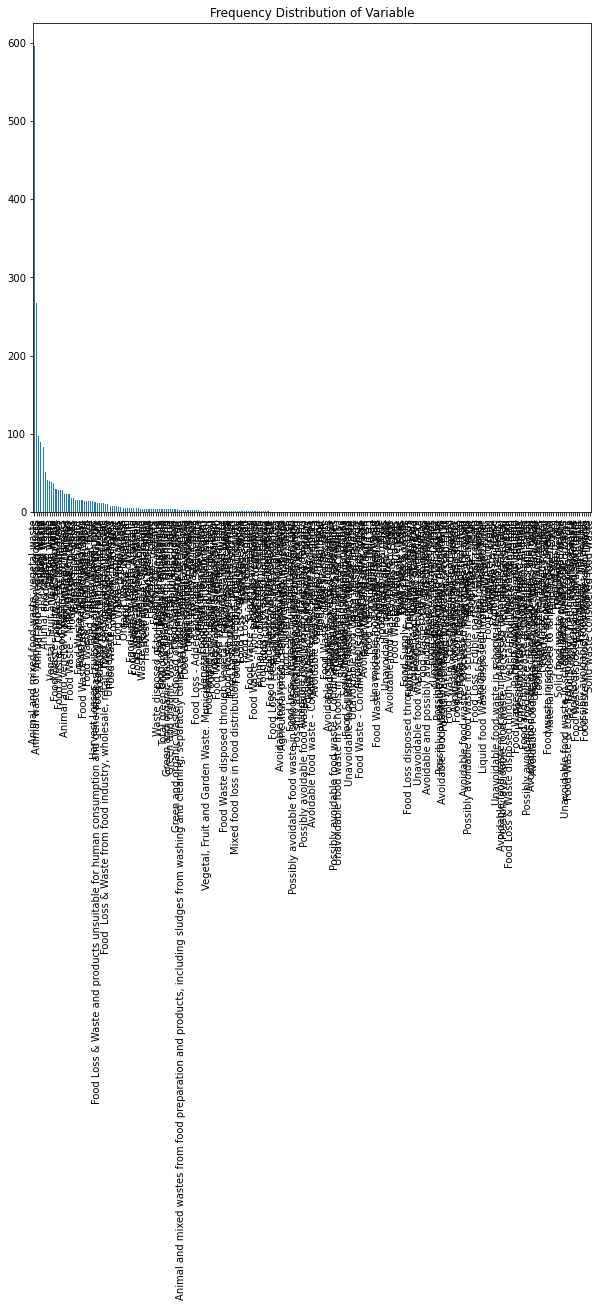

In [29]:
for x in cat:
    univariateAnalysis_category(x)

In [30]:
df_num = df1.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

2

In [31]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df1[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df1[column], kde=False, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df1[column])
    plt.show()

Description of Time
----------------------------------------------------------------------------
count    2204.000000
mean     2007.616152
std         2.848359
min      1993.000000
25%      2006.000000
50%      2008.000000
75%      2010.000000
max      2013.000000
Name: Time, dtype: float64 Distribution of Time
----------------------------------------------------------------------------


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


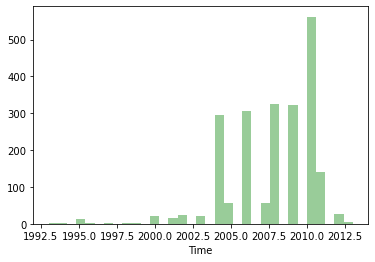

BoxPlot of Time
----------------------------------------------------------------------------


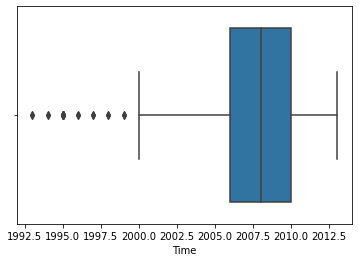

Description of Value
----------------------------------------------------------------------------
count    2.204000e+03
mean     1.148107e+06
std      3.952163e+06
min      1.000000e+00
25%      5.784875e+04
50%      3.578860e+05
75%      6.094735e+05
max      6.038937e+07
Name: Value, dtype: float64 Distribution of Value
----------------------------------------------------------------------------


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


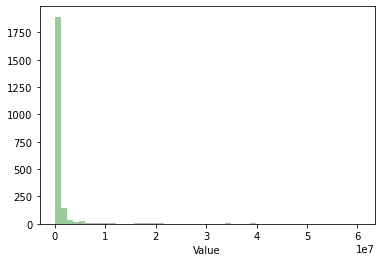

BoxPlot of Value
----------------------------------------------------------------------------


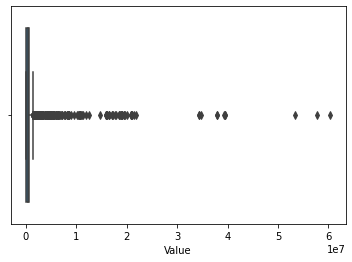

In [32]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

In [33]:
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [34]:
for feature in df1[['Value']]: 
    lr,ur=treat_outlier(df1[feature])
    df1[feature]=np.where(df1[feature]>ur,ur,df1[feature])
    df1[feature]=np.where(df1[feature]<lr,lr,df1[feature])

<ipython-input-34-27730895814f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[feature]=np.where(df1[feature]>ur,ur,df1[feature])
<ipython-input-34-27730895814f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[feature]=np.where(df1[feature]<lr,lr,df1[feature])


<AxesSubplot:>

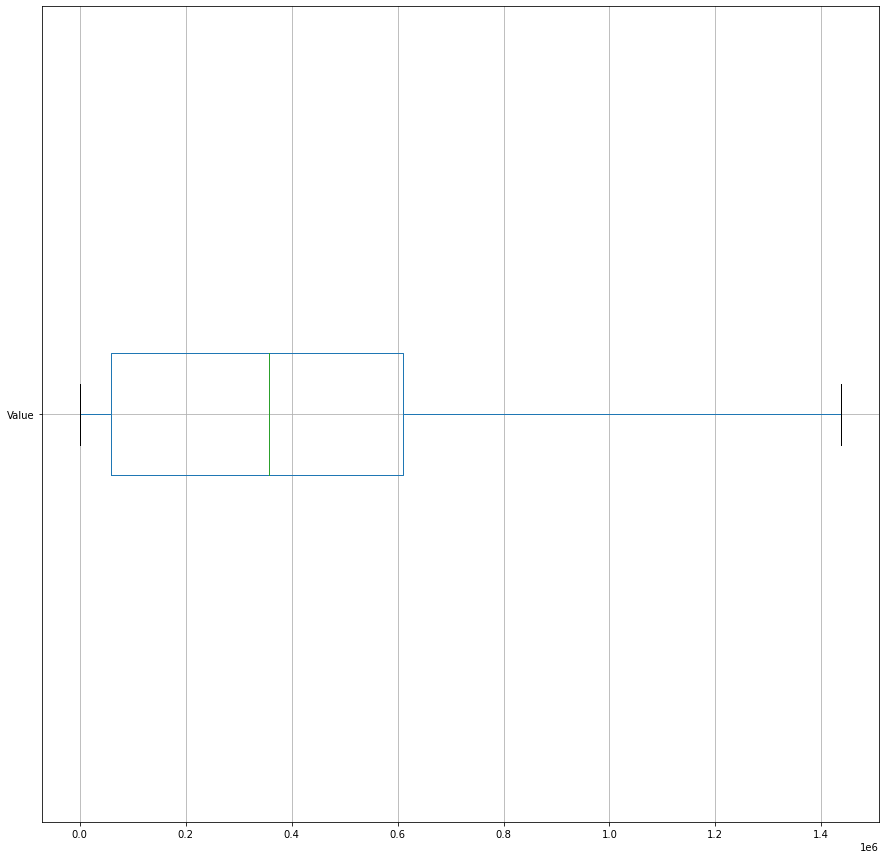

In [35]:
plt.figure(figsize=(15,15))
df1[['Value']].boxplot(vert=0)

In [36]:
df1.sample(5)

,Country,Category,Activity,Unit,Variable,Time,Value
349,Japan,4. Others,Food Industry,tonnes,Food Loss & Waste and products unsuitable for ...,2009.0,1436910.625
1490,Portugal,2. Waste in general,Households,tonnes,Animal and mixed food waste; vegetal waste,2010.0,566215.000
1005,Portugal,1. Food loss - Food waste,Households,tonnes,Food Waste - Edible food,2010.0,1233333.000
1499,Slovak Republic,2. Waste in general,Households,tonnes,Animal and mixed food waste; vegetal waste,2010.0,566215.000
94,France,2. Waste in general,Agricultural production,tonnes,Animal and mixed food waste; vegetal waste,2004.0,470900.000


In [52]:
df1.Variable.nunique()

258

In [54]:
df1.Variable.value_counts()

Animal and mixed food waste; vegetal waste       595
Animal waste of food preparation and products    268
Animal and mixed food waste                       98
Vegetal waste                                     90
Food Waste                                        84
                                                ... 
Food Waste - Non-edible                            1
Possibly avoidable food waste - Oil and fat        1
Food waste in schools in 40 weeks (primary)        1
Food Waste - Drinks                                1
Solid waste considered food waste                  1
Name: Variable, Length: 258, dtype: int64

In [37]:
gb = df1.groupby(['Country'])

In [38]:
gb.first()

,Category,Activity,Unit,Variable,Time,Value
Country,,,,,,
Australia,1. Food loss - Food waste,Households,tonnes,Food Waste - Edible food,2009.0,800000.000
Austria,2. Waste in general,Agricultural production,tonnes,Animal and mixed food waste; vegetal waste,2004.0,9478.000
Belgium,1. Food loss - Food waste,Food Industry,tonnes,Animal food waste,2005.0,581355.000
Canada,1. Food loss - Food waste,Households,tonnes,Food Waste - Edible food (incl bev),2009.0,226796.000
China (People's Republic of),1. Food loss - Food waste,Combined : Post-production and Pre-consumption,tonnes,Food Waste - Alcoholic Beverages,2009.0,57000.000
Czech Republic,2. Waste in general,Agricultural production,tonnes,Animal and mixed food waste; vegetal waste,2004.0,262531.000
Denmark,1. Food loss - Food waste,Agricultural production,tonnes,Unnecessary edible food waste (e.),2011.0,110000.000
Estonia,2. Waste in general,Agricultural production,tonnes,Animal and mixed food waste; vegetal waste,2004.0,36775.000
Finland,2. Waste in general,Agricultural production,tonnes,Animal and mixed food waste; vegetal waste,2004.0,29819.000


In [39]:
pd.crosstab(df1.Country, df1.Category)

Category,1. Food loss - Food waste,2. Waste in general,4. Others
Country,,,
Australia,36,29,0
Austria,12,111,0
Belgium,38,8,0
Canada,95,12,0
China (People's Republic of),13,0,0
Czech Republic,23,62,0
Denmark,45,60,0
Estonia,6,66,0
Finland,6,54,0


In [40]:
pd.crosstab([df1.Country, df1.Variable], df1.Category,margins=False)

Category                                     1. Food loss - Food waste  \
Country       Variable                                                   
Australia     Food Waste - Edible food                               2   
              Food Waste in Garbage Stream                           1   
              Food waste - National                                  6   
              Food waste - New South Wales                           6   
              Food waste - Queensland                                4   
...                                                                ...   
United States Food Waste - Vegetables                                1   
              Solid waste                                            1   
              Total food supply                                      0   
              Vegetal food waste                                     3   
              Vegetal waste generated                                3   

Category                                     2. Waste in general  4. Others  
Country       Variable                                                       
Australia     Food Waste - Edible food                         0          0  
              Food Waste in Garbage Stream                     1          0  
              Food waste - National                            0          0  
              Food waste - New South Wales                     0          0  
              Food waste - Queensland                          0          0  
...                                                          ...        ...  
United States Food Waste - Vegetables                          0          0  
              Solid waste                                      0          0  
              Total food supply                                0          2  
              Vegetal food waste                               0          0  
              Vegetal waste generated                          0          0  

[662 rows x 3 columns]

In [41]:
pd.crosstab([df1.Country, df1.Category], df1.Variable,margins=False)

Variable                                                Agricultural production remaining in the fields  \
Country                      Category                                                                     
Australia                    1. Food loss - Food waste                                                0   
                             2. Waste in general                                                      0   
Austria                      1. Food loss - Food waste                                                0   
                             2. Waste in general                                                      0   
Belgium                      1. Food loss - Food waste                                                0   
                             2. Waste in general                                                      0   
Canada                       1. Food loss - Food waste                                                0   
                             2. Waste in general                                                      0   
China (People's Republic of) 1. Food loss - Food waste                                                0   
Czech Republic               1. Food loss - Food waste                                                0   
                             2. Waste in general                                                      0   
Denmark                      1. Food loss - Food waste                                                0   
                             2. Waste in general                                                      0   
Estonia                      1. Food loss - Food waste                                                0   
                             2. Waste in general                                                      0   
Finland                      1. Food loss - Food waste                                                0   
                             2. Waste in general                                                      0   
France                       1. Food loss - Food waste                                                0   
                             2. Waste in general                                                      0   
Germany                      1. Food loss - Food waste                                                0   
                             2. Waste in general                                                      0   
Greece                       1. Food loss - Food waste                                                0   
                             2. Waste in general                                                      0   
Hungary                      1. Food loss - Food waste                                                0   
                             2. Waste in general                                                      0   
Iceland                      2. Waste in general                                                      0   
Ireland                      1. Food loss - Food waste                                                0   
                             2. Waste in general                                                      0   
Italy                        1. Food loss - Food waste                                                1   
                             2. Waste in general                                                      0   
Japan                        1. Food loss - Food waste                                                0   
                             4. Others                                                                0   
Korea                        1. Food loss - Food waste                                                0   
Luxembourg                   1. Food loss - Food waste                                                0   
                             2. Waste in general                                                      0   
Mexico                       1. Food loss

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


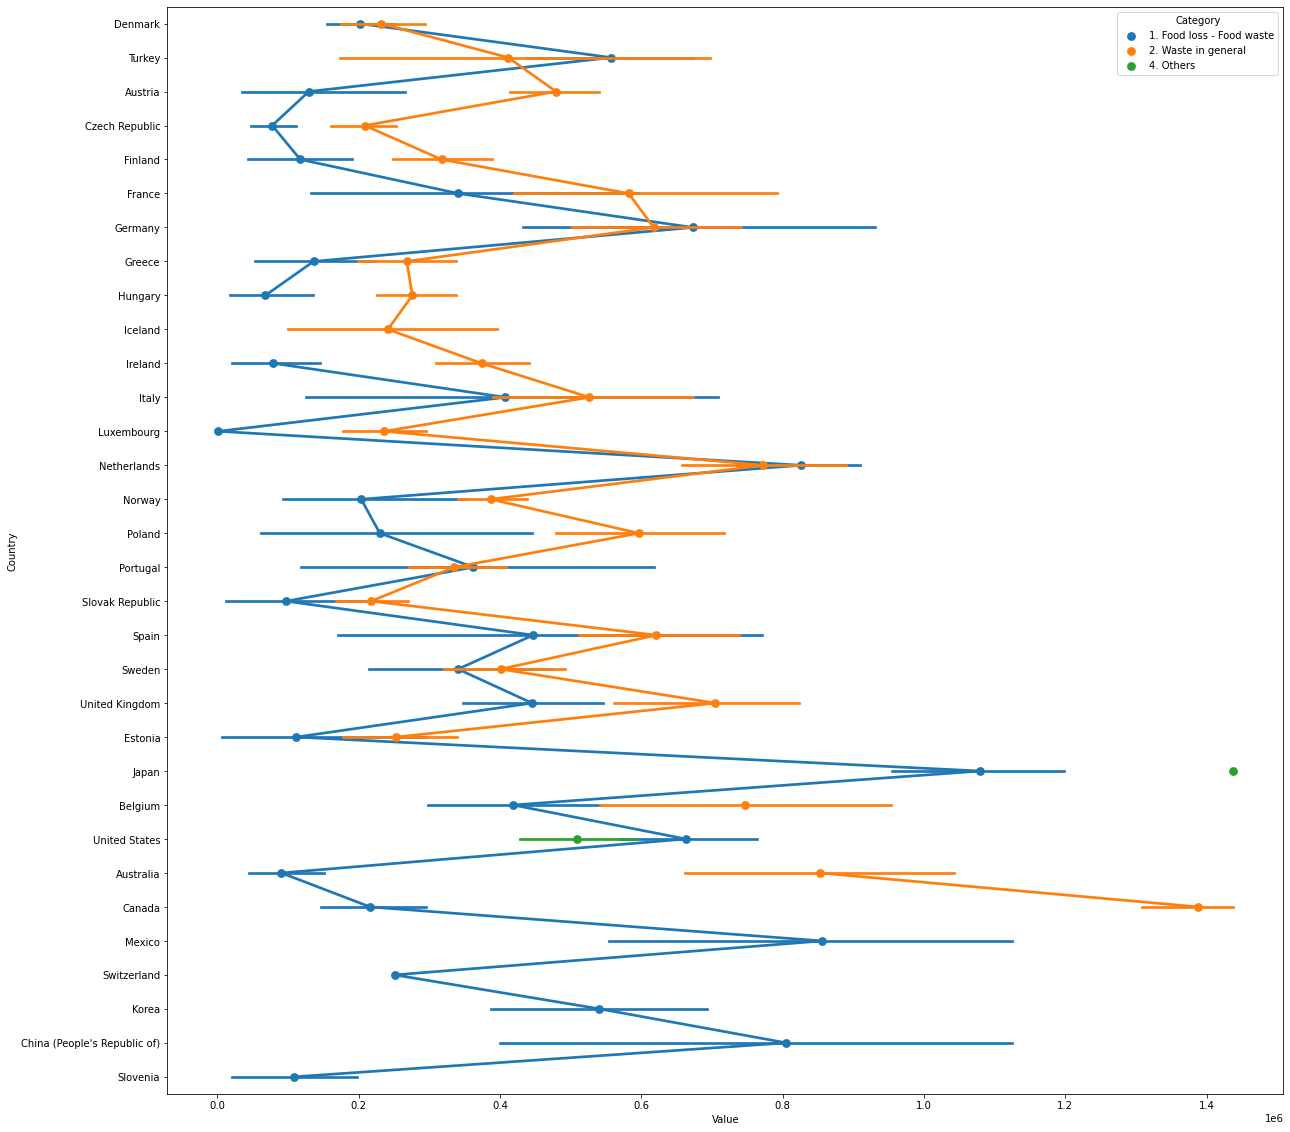

In [43]:
plt.figure(figsize=(20, 20))

sns.pointplot(df1['Value'], df1['Country'], hue=df1['Category']);


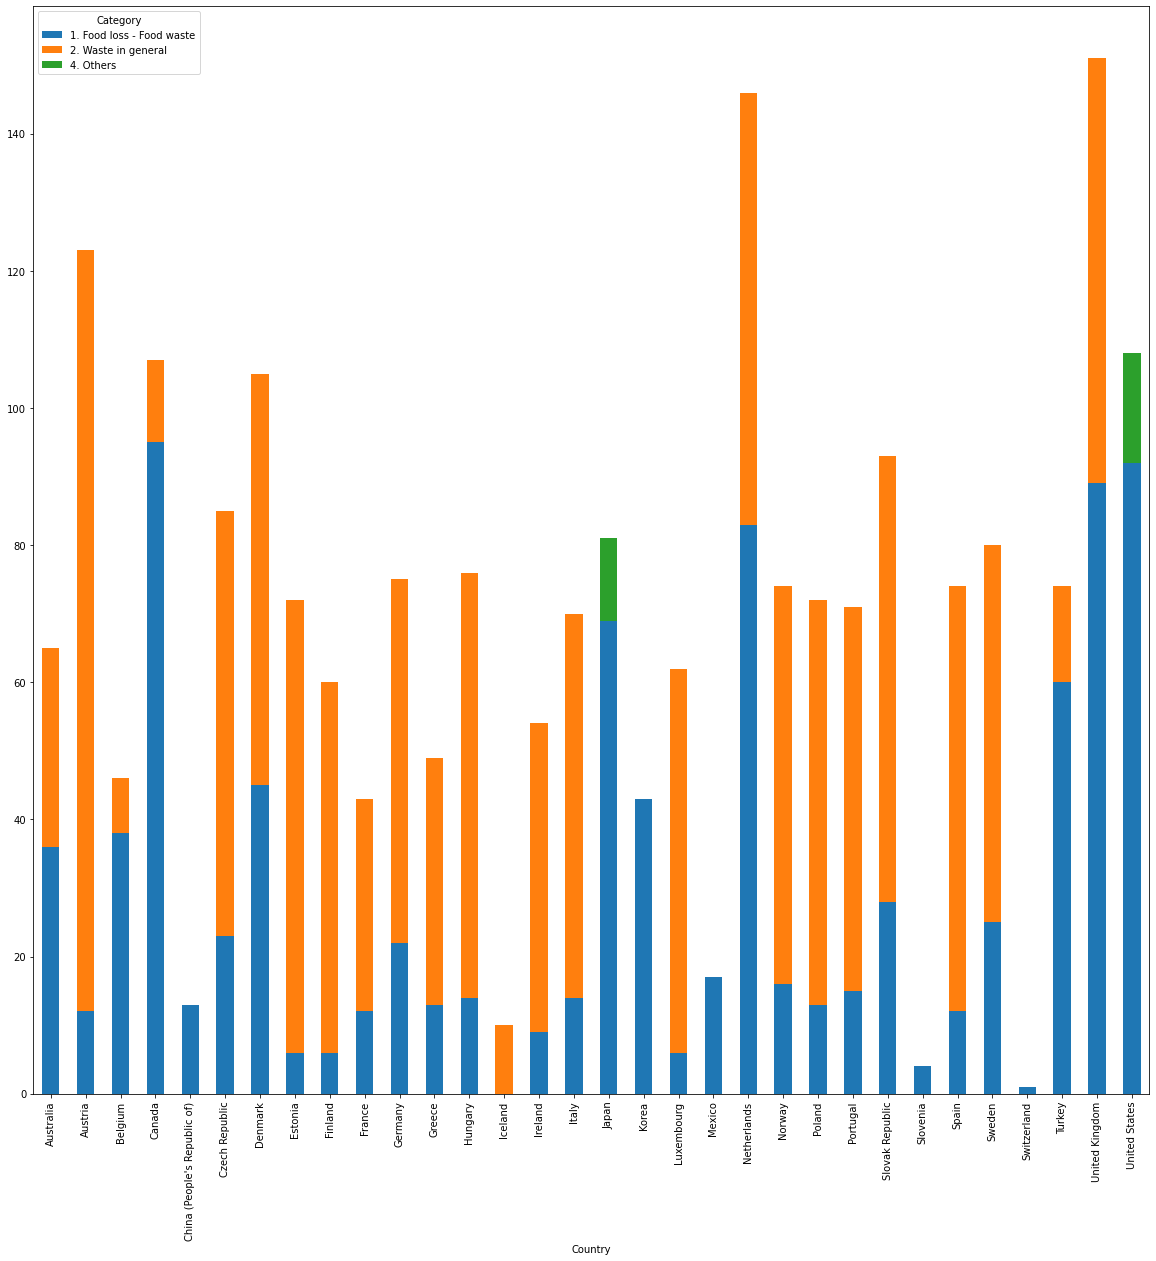

In [44]:
ct = pd.crosstab(df1['Country'],df1['Category'], margins=True )
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(stacked = True,figsize = (20,20))
plt.show()

([<matplotlib.patches.Wedge at 0x235c46b7460>,
 [Text(-0.2226668387923245, 1.0772276820163105, '2. Waste in general'),
  Text(0.17950736578827772, -1.0852543967327446, '1. Food loss - Food waste'),
  Text(1.099124015840259, -0.043890748491930996, '4. Others')],
 [Text(-0.12145463934126789, 0.5875787356452602, '56.5%'),
  Text(0.09791310861178784, -0.5919569436724061, '42.2%'),
  Text(0.5995221904583231, -0.023940408268325993, '1.3%')])

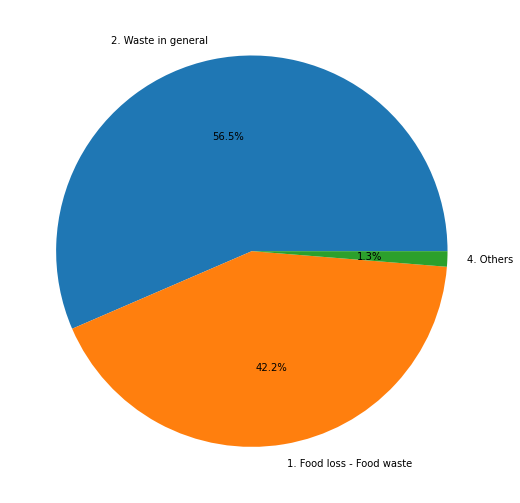

In [45]:
plt.figure(figsize=(9,9))
plt.pie(df1["Category"].value_counts(),labels=df1["Category"].value_counts().index,autopct='%1.1f%%')

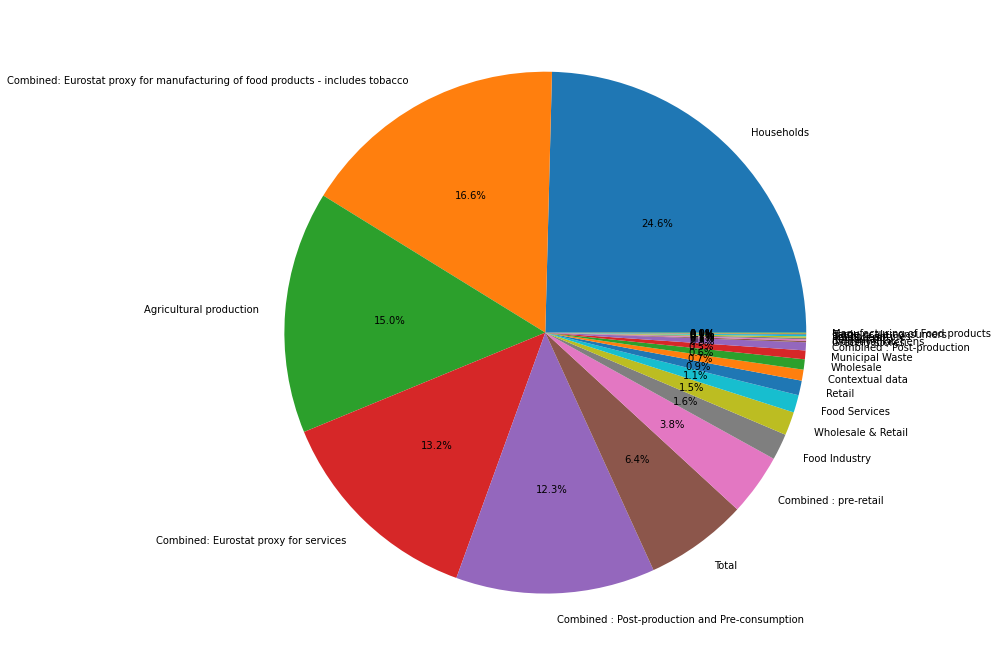

In [51]:
plt.figure(figsize=(12,12))
plt.pie(df1["Activity"].value_counts(),labels=df1["Activity"].value_counts().index,autopct='%1.1f%%')
plt.show()